<a href="https://colab.research.google.com/github/Malothuabhiram/NNFL_PROJECT/blob/main/NNFL_PROJECT_ANN_Based_Breathalyzer_Analysis_for_Accurate_Blood_Alcohol_Content_(BAC)_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Root mean square(RMS Optimazation Technique)

ANN BASIC CODE

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    250 non-null    int64  
 1   Weight                 250 non-null    int64  
 2   Gender                 250 non-null    int64  
 3   Drinks_Consumed        250 non-null    int64  
 4   Time_Since_Last_Drink  250 non-null    float64
 5   Estimated_BAC          250 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 11.8 KB
None

First 5 rows:
    Age  Weight  Gender  Drinks_Consumed  Time_Since_Last_Drink  Estimated_BAC
0   56      68       0                7                    6.0       0.115882
1   46      97       0                2                    4.5       0.000000
2   32      52       0                6                    4.3       0.166269
3   25      69       1                6                    4.7       0.103413
4  

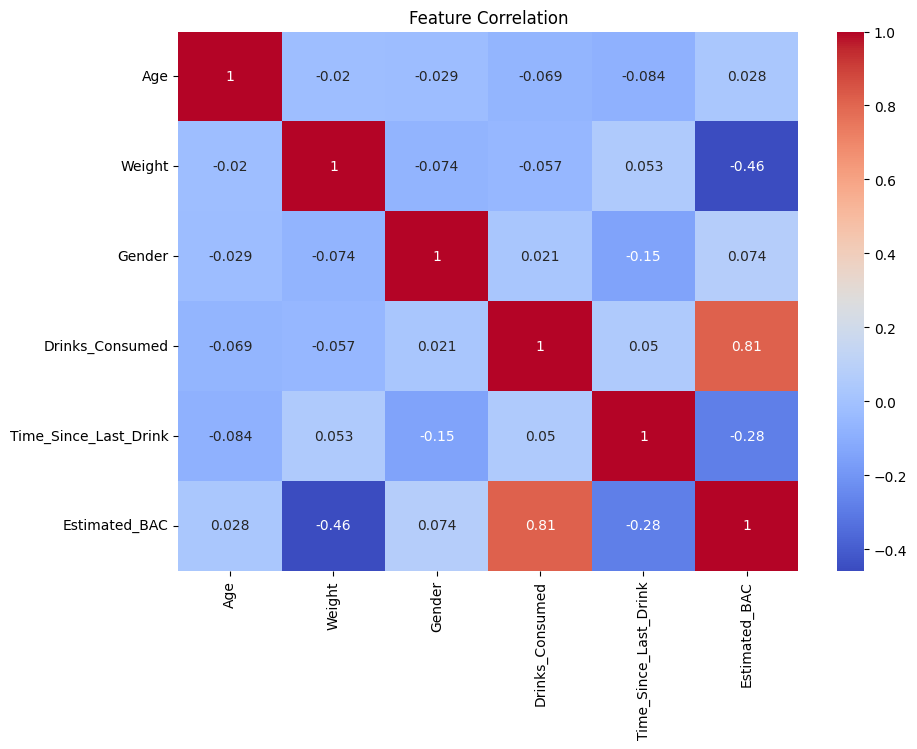

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0607 - mae: 0.1802 - val_loss: 0.0234 - val_mae: 0.1285
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0133 - mae: 0.0930 - val_loss: 0.0145 - val_mae: 0.1004
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0090 - mae: 0.0768 - val_loss: 0.0081 - val_mae: 0.0751
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0042 - mae: 0.0520 - val_loss: 0.0057 - val_mae: 0.0605
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0038 - mae: 0.0500 - val_loss: 0.0046 - val_mae: 0.0521
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - mae: 0.0361 - val_loss: 0.0037 - val_mae: 0.0474
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0022 - mae: 0.0366 - val_loss: 0.0028 - val_mae: 0.0405
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0016 - mae: 0.0316 - val_loss: 0.0023 - val_mae: 0.0367
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0010 - mae: 

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
dataset = pd.read_csv('/content/ANN_Breathalyzer_BAC_Estimation.csv')

# Display dataset info
print("Dataset Info:\n")
print(dataset.info())
print("\nFirst 5 rows:\n", dataset.head())
print("\nDescription:\n", dataset.describe())

# Check correlation
corr_matrix = dataset.corr(numeric_only=True)
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Split features and target
# Assume target is the last column (Blood Alcohol Concentration)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Encode categorical features if any
# We'll check for 'Sex' column and encode it (if it exists)
from sklearn.preprocessing import LabelEncoder

if 'Sex' in dataset.columns:
    sex_index = dataset.columns.get_loc('Sex')
    le = LabelEncoder()
    X[:, sex_index] = le.fit_transform(X[:, sex_index])

# Convert X to float type (some models require it)
X = X.astype(float)

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Build ANN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))  # Linear output for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2)

# Predict on test data
y_pred = model.predict(X_test)

# Show actual vs predicted
comparison = pd.DataFrame({'Predicted BAC': y_pred.flatten(), 'Actual BAC': y_test})
print("\nPrediction Comparison:\n", comparison.head())

# Evaluate performance
from sklearn.metrics import mean_squared_error, r2_score

print("\nMSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Optional: Predict a new sample
# Replace with valid scaled input based on your features
# e.g., sample_input = sc.transform([[value1, value2, ..., valueN]])
# print("Predicted BAC for sample input:", model.predict(sample_input))


ANN ADAM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


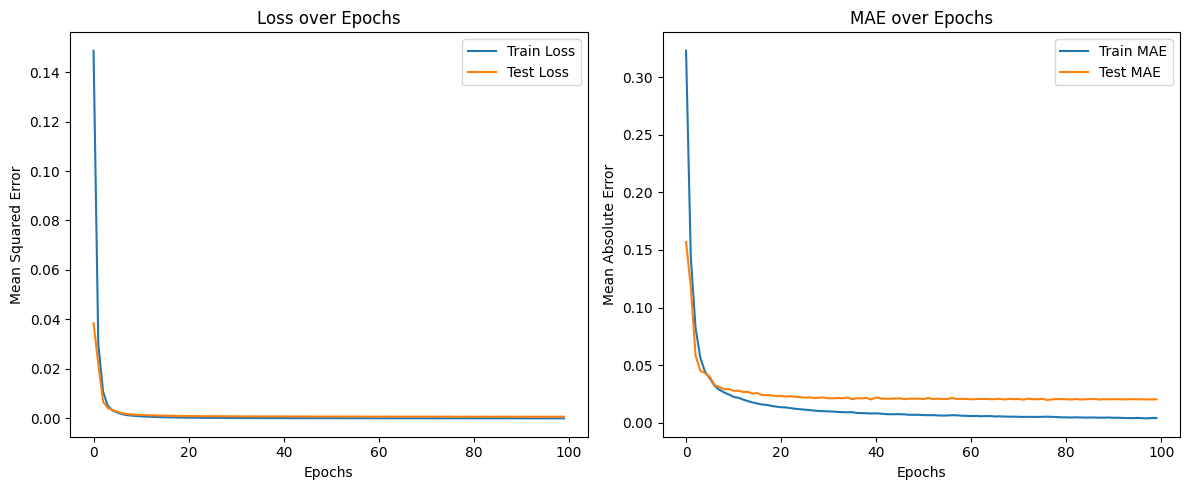

✅ Test Mean Absolute Error (MAE): 0.0203
✅ Test Mean Squared Error (Loss): 0.0007
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
✅ Test R² Score (Accuracy-like): 0.8837


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ANN_Breathalyzer_BAC_Estimation.csv")

# Prepare data
X = df.drop('Estimated_BAC', axis=1).values
y = df['Estimated_BAC'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=16, verbose=0)

# Plotting
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"✅ Test Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"✅ Test Mean Squared Error (Loss): {test_loss:.4f}")

# R² Score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"✅ Test R² Score (Accuracy-like): {r2:.4f}")


ANN WITH RMS OPTIMIZATION TECHNIQUE

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


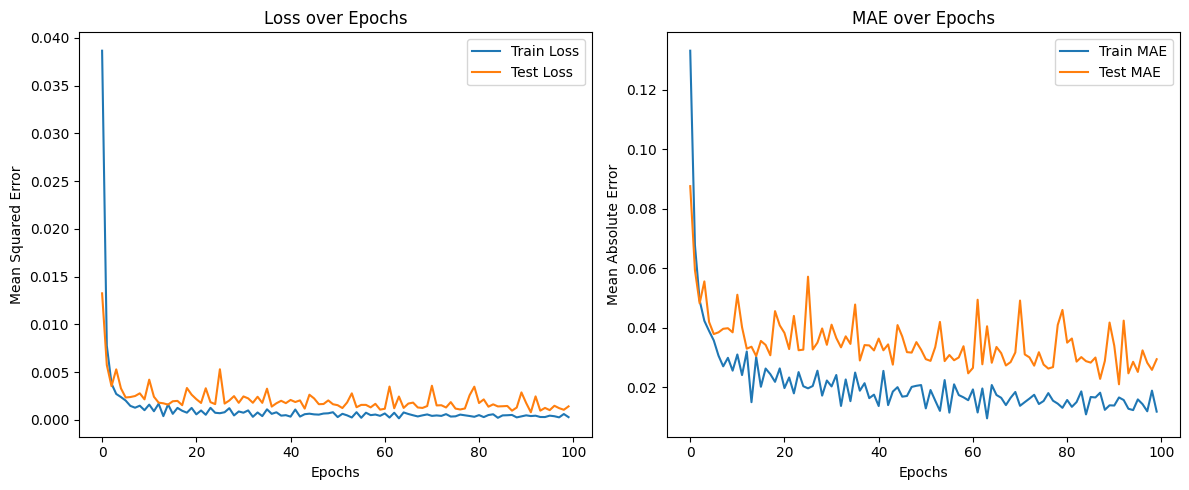

✅ Test Mean Absolute Error (MAE): 0.0293
✅ Test Mean Squared Error (Loss): 0.0014
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
✅ Test R² Score (Accuracy-like): 0.7600


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ANN_Breathalyzer_BAC_Estimation.csv")

# Prepare data
X = df.drop('Estimated_BAC', axis=1).values
y = df['Estimated_BAC'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile model with RMSprop optimizer
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Train model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=16, verbose=0)

# Plotting
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"✅ Test Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"✅ Test Mean Squared Error (Loss): {test_loss:.4f}")

# Predict
y_pred = model.predict(X_test_scaled).flatten()

# Manually calculate R² Score
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (ss_res / ss_tot)

print(f"✅ Test R² Score (Accuracy-like): {r2:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


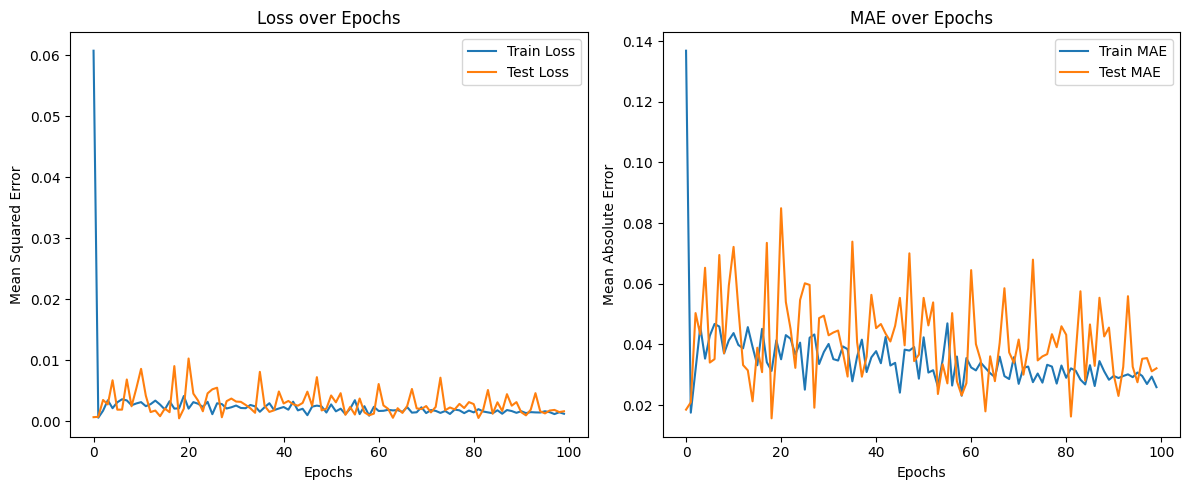

✅ Test Mean Absolute Error (MAE): 0.0321
✅ Test Mean Squared Error (Loss): 0.0016
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
✅ Test R² Score (Accuracy-like): 0.7244


In [ ]:

#without using relu,sigmoid:


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ANN_Breathalyzer_BAC_Estimation.csv")

# Prepare data
X = df.drop('Estimated_BAC', axis=1).values
y = df['Estimated_BAC'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build model without non-linear activations (pure linear ANN)
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='linear'),
    Dense(32, activation='linear'),
    Dense(1, activation='linear')  # Regression output
])

# Compile model using RMSProp
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])

# Train model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test),
                    epochs=100, batch_size=16, verbose=0)

# Plot training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Test MAE')
plt.title('MAE over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate model
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"✅ Test Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"✅ Test Mean Squared Error (Loss): {test_loss:.4f}")

# Predict & Calculate R² Score
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"✅ Test R² Score (Accuracy-like): {r2:.4f}")
